In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import optimize
import pandas as pd
i = 0
#switching latex fonts
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'fantasy',
    "font.fantasy": ['Arial', 'Times New Roman', 'Tahoma']})


In [4]:
x = np.array([
1, 2, 3, 4])
y = np.array([
1, 2, 3, 7
])
xerr = np.array([
0, 0, 0, 0
])
yerr = np.array([
0.1, 0.1, 0.1, 2
])

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'fantasy' not found because none of the following families were found: Arial, Times New Roman, Tahoma
findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'fantasy' not found because none of the following families were found: Arial, Times New Roman, Tahoma


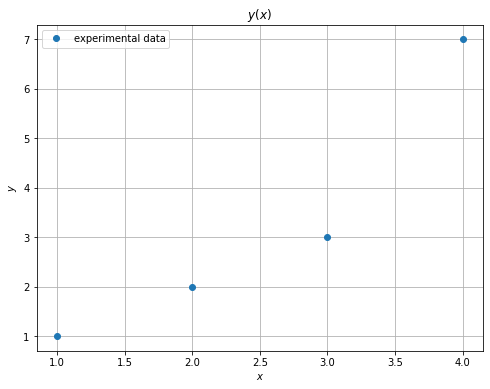

In [5]:
#simple visualization
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="experimental data")
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$y(x)$")

plt.legend()

plt.savefig(f"viz{i}.png", dpi=200)
i+=1

1.9000000000019623 0.5196152398272164
-1.5000000000054503 1.4230249470840453
1.9000000000019623 0.5196152398272164
-1.5000000000054503 1.4230249470840453


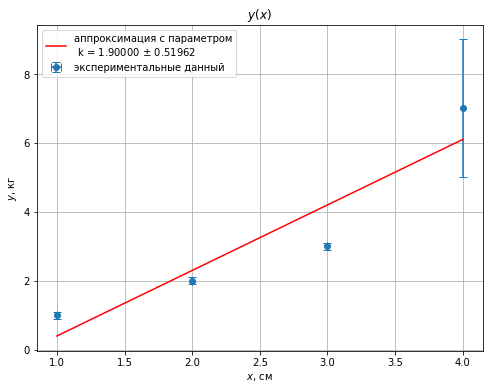

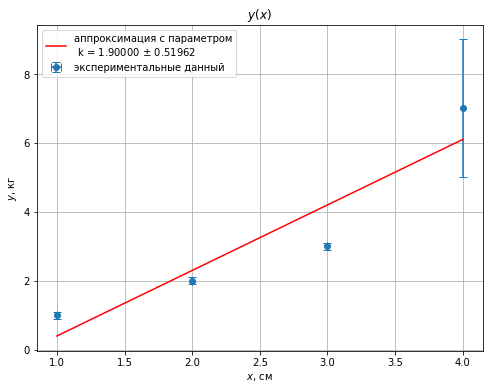

In [6]:
#simple approximation without errors (OLS)
# i=100

def f(x, k, b):
    return b + k * x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
error = np.sqrt(np.diag(pcov))
for v, er in zip(popt, error):
    print(v, er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", xerr=xerr, yerr=yerr, label="экспериментальные данный", capsize=4, ms=6)
X = np.linspace(x.min(), x.max(), num=50)
pres = '0.5f'   # точность при форматировании
plt.plot(X, f(X, *popt), 'r', label=
f"аппроксимация с параметром\n k = {format(popt[0], pres)} $\pm$ {format(error[0], pres)}")

plt.grid(True)
plt.xlabel(r"$x$, см")
plt.ylabel(r"$y$, кг")
plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"opt{i}.png", dpi=200)
i+=1

1.0074565037282681 0.0745960978069429
-0.012427506215961781 0.161308801361053


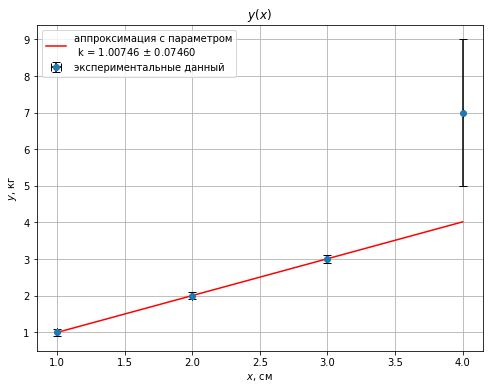

In [12]:
#simple approximation with errors (WLS)
# i=100

def f(x, k, b):
    return b + k * x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y, sigma=yerr)
error = np.sqrt(np.diag(pcov))
for v, er in zip(popt, error):
    print(v, er)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, fmt="o", xerr=xerr, yerr=yerr, label="экспериментальные данный", capsize=4, ms=6, ecolor='black')
X = np.linspace(x.min(), x.max(), num=50)
pres = '0.5f'   # точность при форматировании
plt.plot(X, f(X, *popt), 'r', label=
f"аппроксимация с параметром\n k = {format(popt[0], pres)} $\pm$ {format(error[0], pres)}")

plt.grid(True)
plt.xlabel(r"$x$, см")
plt.ylabel(r"$y$, кг")
plt.title(r"$y(x)$")
plt.legend()

plt.savefig(f"opt{i}.png", dpi=200)
i+=1